In [1]:
import os
import sys
import dask
import uproot4
import numpy as np
import pandas as pd
from hist import Hist
import hist
import uproot4 as uproot
from dask.array import histogram as ds_hist
import dask.dataframe as dd
import timeit
from dask.distributed import Client

##procedurre to make client dask work
# read hdf data convert it to csv and save it, then read csv with dask data frame

In [2]:
client = Client(n_workers=4)

In [3]:
client

Client Scheduler: tcp://127.0.0.1:46106 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 12 Memory: 30.71 GB


In [17]:
temp = pd.read_hdf('Skl_Data/test12345.h5')



In [5]:
type(temp)

pandas.core.frame.DataFrame

In [22]:
temp

leptons_pt      jets_pt   weight_mc  runNumber       BDT
event lep jet bdt                                                             
0     0   0   0    127083.039062  104784.4375  736.971985     284500  0.344902
              1    127083.039062  104784.4375  736.971985     284500  0.367624
              2    127083.039062  104784.4375  736.971985     284500  0.069904
              3    127083.039062  104784.4375  736.971985     284500  0.010252
              4    127083.039062  104784.4375  736.971985     284500  0.207318
...                          ...          ...         ...        ...       ...
3681  0   3   0     89429.367188   48895.3125  735.537537     284500  0.151289
              1     89429.367188   48895.3125  735.537537     284500  0.329823
              2     89429.367188   48895.3125  735.537537     284500  0.144091
              3     89429.367188   48895.3125  735.537537     284500  0.116522
              4     89429.367188   48895.3125  735.537537     284500  0.258275

[91250 rows x 5 columns]

In [25]:
lol = dd.read_csv("Skl_Data/test0.csv")

In [44]:
df = lol.compute()

In [48]:
df['leptons_pt']

0        127083.040
1        127083.040
2        127083.040
3        127083.040
4        127083.040
            ...    
45346     55017.620
45347     55017.620
45348     55017.620
45349     55017.620
45350     53743.227
Name: leptons_pt, Length: 45351, dtype: float64

In [23]:
#lol = dd.from_pandas(temp,npartitions=1)

NotImplementedError: Dask does not support MultiIndex Dataframes.

In [6]:
temp.loc[(3000,0,0,0)]

leptons_pt     39250.191406
jets_pt       111290.656250
weight_mc        735.962708
runNumber     284500.000000
BDT                0.261029
Name: (3000, 0, 0, 0), dtype: float64

In [7]:
temp.columns
max(temp['leptons_pt'])

562724.75

In [8]:
temp.index[len(temp)-1][0]

3681

In [9]:
x = [temp.loc[:(int(temp.index[len(temp)-1][0]/2),0,0,0)],temp.loc[(int(temp.index[len(temp)-1][0]/2),0,0,0):]] ##change that later but w/e

In [10]:
type(x[0])

pandas.core.frame.DataFrame

In [11]:
x[0]

leptons_pt        jets_pt   weight_mc  runNumber  \
event lep jet bdt                                                        
0     0   0   0    127083.039062  104784.437500  736.971985     284500   
              1    127083.039062  104784.437500  736.971985     284500   
              2    127083.039062  104784.437500  736.971985     284500   
              3    127083.039062  104784.437500  736.971985     284500   
              4    127083.039062  104784.437500  736.971985     284500   
...                          ...            ...         ...        ...   
1839  0   2   1     55017.621094   47182.367188  735.715088     284500   
              2     55017.621094   47182.367188  735.715088     284500   
              3     55017.621094   47182.367188  735.715088     284500   
              4     55017.621094   47182.367188  735.715088     284500   
1840  0   0   0     53743.226562  207344.234375  735.715088     284500   

                        BDT  
event lep jet bdt            
0     0   0   0    0.344902  
              1    0.367624  
              2    0.069904  
              3    0.010252  
              4    0.207318  
...                     ...  
1839  0   2   1    0.037250  
              2    0.072236  
              3    0.155460  
              4    0.132336  
1840  0   0   0    0.436274  

[45351 rows x 5 columns]

In [12]:
for i in range(len(x)):
    x[i].to_csv(f'Skl_Data/test{i}.csv')

In [18]:
storage = pd.HDFStore('Skl_Data/storage_test.h5')
storage.put('data1',x[0],format = 'table')

In [19]:

z = dd.read_hdf('Skl_Data/storage_test.h5','data1')

In [20]:
type(z)

dask.dataframe.core.DataFrame

In [27]:
x, bins = ds_hist(lol['leptons_pt'], bins = 100,range = [0,562724.75*1.5])

In [28]:
%%time
x.compute()

CPU times: user 29.2 ms, sys: 12.7 ms, total: 41.8 ms
Wall time: 381 ms


array([   0,    0,    0, 6250, 6785, 5510, 5291, 4230, 3595, 2760, 2040,
       1630, 1445,  945,  845,  885,  795,  385,  335,  345,  220,  165,
        100,  160,  170,   65,   95,   55,   30,   25,   50,   35,    0,
          0,    0,    0,   60,    0,    0,    0,    0,    0,    0,   25,
          0,    0,   25,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0])

In [29]:
bins

array([     0.     ,   8440.87125,  16881.7425 ,  25322.61375,
        33763.485  ,  42204.35625,  50645.2275 ,  59086.09875,
        67526.97   ,  75967.84125,  84408.7125 ,  92849.58375,
       101290.455  , 109731.32625, 118172.1975 , 126613.06875,
       135053.94   , 143494.81125, 151935.6825 , 160376.55375,
       168817.425  , 177258.29625, 185699.1675 , 194140.03875,
       202580.91   , 211021.78125, 219462.6525 , 227903.52375,
       236344.395  , 244785.26625, 253226.1375 , 261667.00875,
       270107.88   , 278548.75125, 286989.6225 , 295430.49375,
       303871.365  , 312312.23625, 320753.1075 , 329193.97875,
       337634.85   , 346075.72125, 354516.5925 , 362957.46375,
       371398.335  , 379839.20625, 388280.0775 , 396720.94875,
       405161.82   , 413602.69125, 422043.5625 , 430484.43375,
       438925.305  , 447366.17625, 455807.0475 , 464247.91875,
       472688.79   , 481129.66125, 489570.5325 , 498011.40375,
       506452.275  , 514893.14625, 523334.0175 , 531774

In [60]:
h = (
    Hist.new.Reg(100, 0, 562724.75*1.5, name="S", label="s [units]", flow=False)
    .Double()
)

In [61]:
@dask.delayed
def fill_hist(empty_hist,data_list):
    for data in data_list:
        empty_hist.fill(data)
        
    return empty_hist

In [68]:
fill_hist(h,[lol['leptons_pt'],lol['leptons_pt']])

Delayed('fill_hist-016b99a3-8355-4780-9672-c81d09055eac')

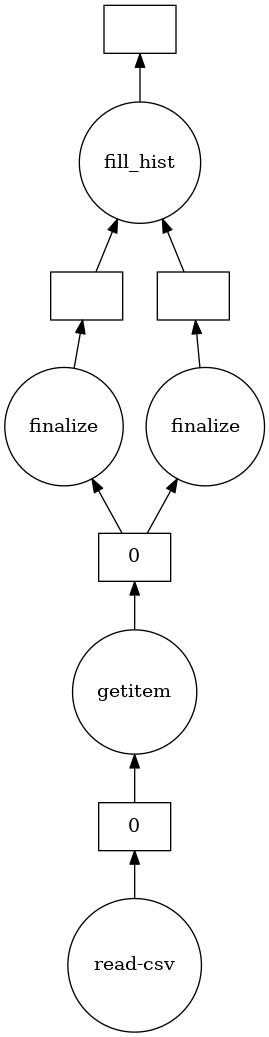

In [69]:
fill_hist(h,[lol['leptons_pt'],lol['leptons_pt']]).visualize()

In [70]:
h = fill_hist(h,[lol['leptons_pt'],lol['leptons_pt']]).compute()

In [71]:
h

Hist(Regular(100, 0, 844087, name='S', label='s [units]'), storage=Double()) # Sum: 136053.0

In [72]:
z['leptons_pt']

Dask Series Structure:
npartitions=1
    float32
        ...
Name: leptons_pt, dtype: float32
Dask Name: getitem, 2 tasks